In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime  # Correct import

# data visualization
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('ggplot')  # This should work now
from pylab import rcParams
from sklearn import metrics #model performance metrics
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

In [2]:
import plotly.express as px

In [3]:
import seaborn as sns
print(sns.__version__)  # Check if it imports and prints a version

0.13.2


In [4]:
data_sales = pd.read_excel(r'C:\Users\risha\Downloads\MRA_Rishabh\Sales_Data.xlsx')


In [5]:
df = data_sales.copy()

In [6]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        897 Long Airport Avenue   
1    Reims Collectables        26.47.1555             59 rue de l'Abbaye   
2       Lyon Souveniers  +33 1 46 62 7555  27 rue du Colonel Pierre Avia   
3     Toys4GrownUps.com        6265557265             78934 Hillside Dr.   
4  Technics Stores Inc.        6505556809              9408 Furth Circle   

         CITY POSTALCODE COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         NYC      10022     USA              Yu             Kwai    Small  
1       Reims      51100  France         Henriot             Paul    Small  
2       Paris      75508  France        Da Cunha           Daniel   Medium  
3    Pasadena      90003     USA           Young            Julie   Medium  
4  Burlingame      94217     USA          Hirano             Juri   Medium

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [8]:
df.shape

(2747, 20)

In [9]:
df.describe()

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098951         6.491081   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   
std       91.877521         9.762135    42.042548         4.230544   

              SALES                      ORDERDATE  DAYS_SINCE_LASTORDER  \
count   2747.000000                           2747           2747.000000   
mean    3553.047583  2019-05-13 21:56:17.211503360           1757.085912   
min      482.130000            2018-01-06 00:00:00             42.000000   
25%     2204.350000            2018-11-08 00:00:00           1077.000000   
50%     3184.800000            2019-06-24 00:00:00           1761.000000   
75%     4503.095000            2019-11-17 00:00:00           2436.500000   
max    14082.800000            2020-05-31 00:00:00           3562.000000   
std     1838.953901                            NaN            819.280576   

              MSRP  
count  2747.000000  
mean    100.691664  
min      33.000000  
25%      68.000000  
50%      99.000000  
75%     124.000000  
max     214.000000  
std      40.114802

In [10]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

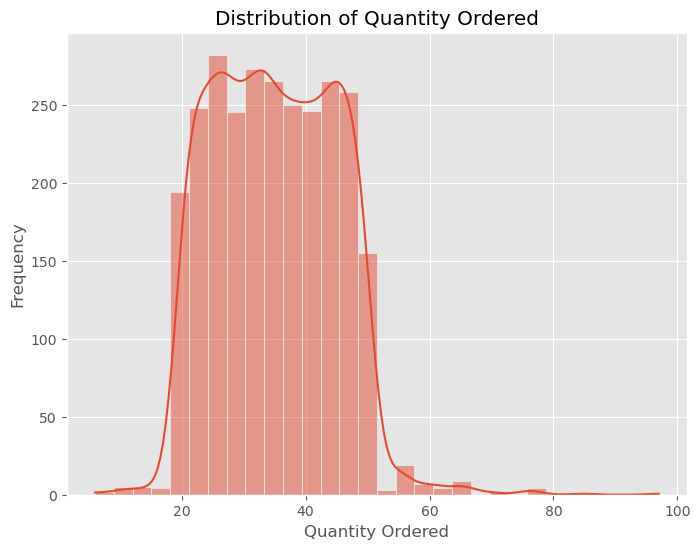

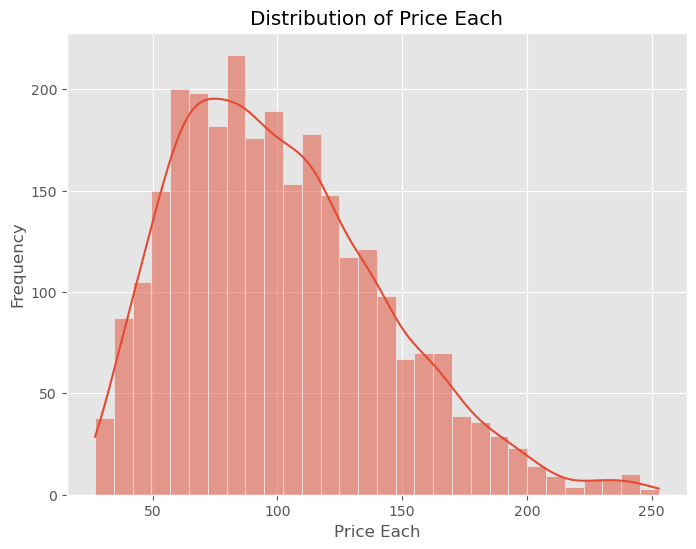

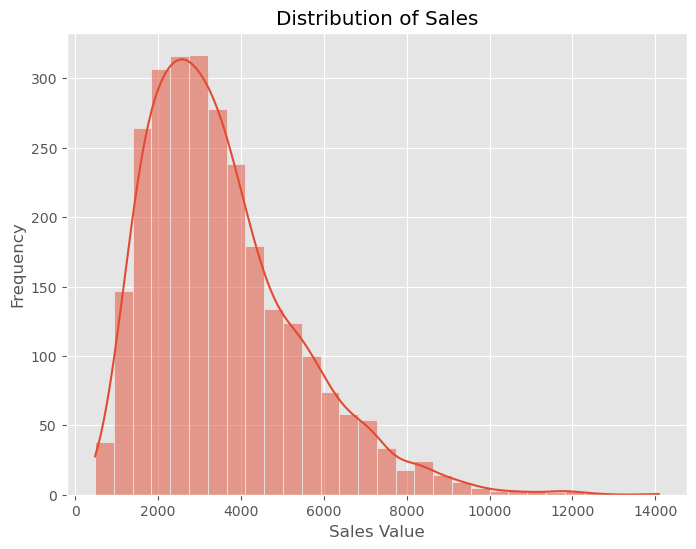

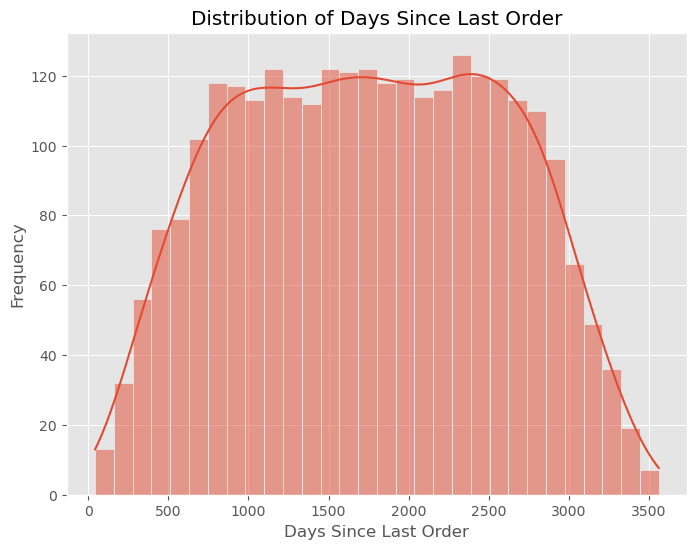

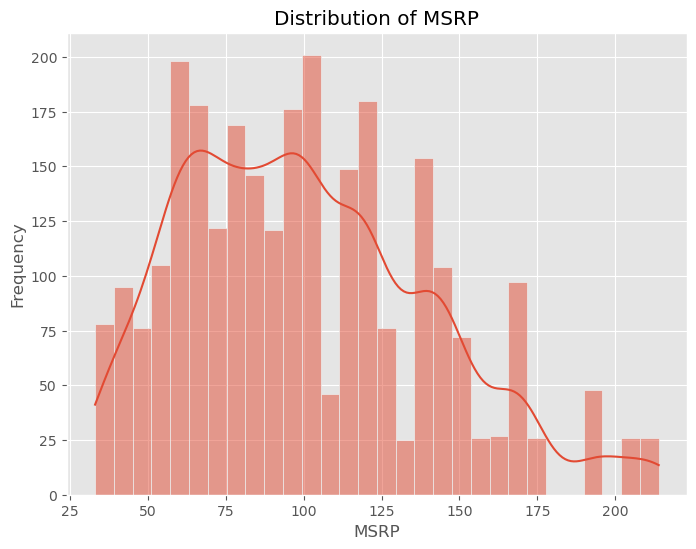

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram for Numerical Variables (e.g., 'QUANTITYORDERED')
plt.figure(figsize=(8, 6))
sns.histplot(df['QUANTITYORDERED'], bins=30, kde=True)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

# Repeat for other numerical columns like 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP'
plt.figure(figsize=(8, 6))
sns.histplot(df['PRICEEACH'], bins=30, kde=True)
plt.title('Distribution of Price Each')
plt.xlabel('Price Each')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['SALES'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['DAYS_SINCE_LASTORDER'], bins=30, kde=True)
plt.title('Distribution of Days Since Last Order')
plt.xlabel('Days Since Last Order')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['MSRP'], bins=30, kde=True)
plt.title('Distribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.show()






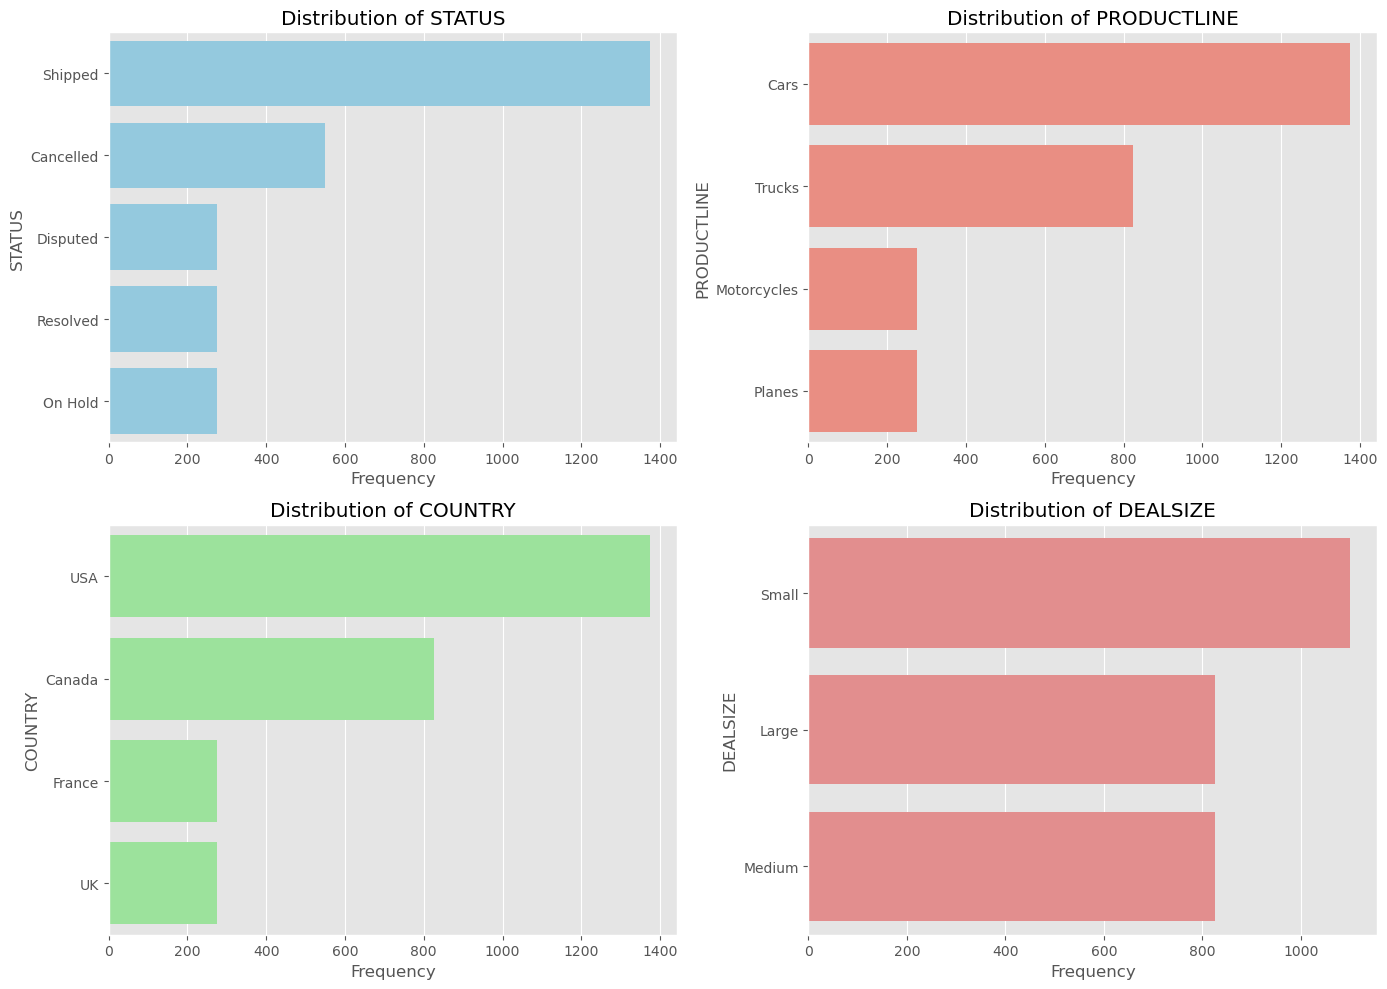

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns



categorical_cols = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # Create a 2x2 grid of subplots
axes = axes.flatten() # Flatten the 2D array of axes for easy indexing

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

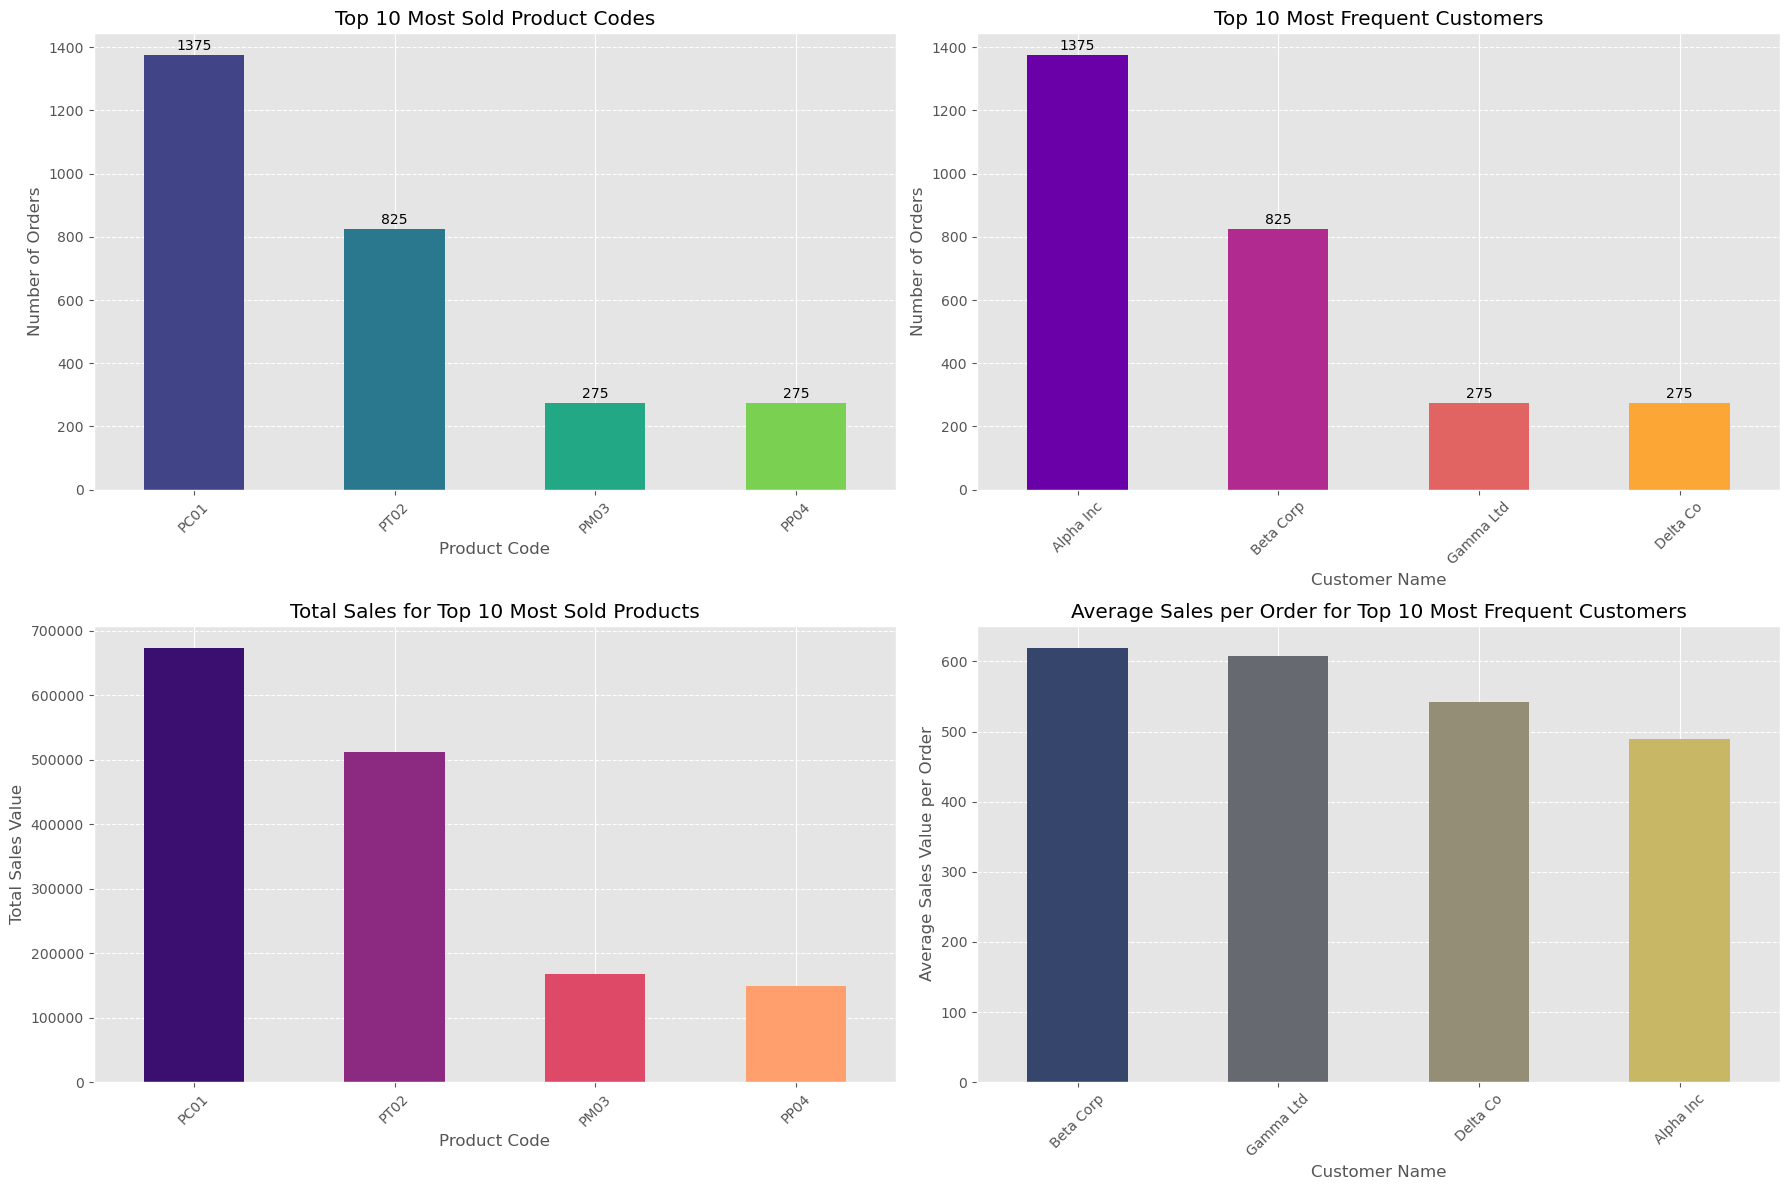

In [26]:


# Get top product and customer counts
product_counts = df['PRODUCTCODE'].value_counts().head(10)
customer_counts = df['CUSTOMERNAME'].value_counts().head(10)

# Link Product Sales to Top Products
top_products = product_counts.index.tolist()
top_product_sales = df[df['PRODUCTCODE'].isin(top_products)].groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False)

# Average Sales per Order for Top Customers
top_customers = customer_counts.index.tolist()
customer_avg_sales = df[df['CUSTOMERNAME'].isin(top_customers)].groupby('CUSTOMERNAME')['SALES'].mean().sort_values(ascending=False)

# --- Plotting Side by Side ---

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Top 10 Most Sold Product Codes
colors_product = sns.color_palette('viridis', n_colors=len(product_counts))
product_counts.plot(kind='bar', color=colors_product, ax=axes[0])
axes[0].set_title('Top 10 Most Sold Product Codes')
axes[0].set_xlabel('Product Code')
axes[0].set_ylabel('Number of Orders')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--')
for i, v in enumerate(product_counts):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom')

# Top 10 Most Frequent Customers
colors_customer = sns.color_palette('plasma', n_colors=len(customer_counts))
customer_counts.plot(kind='bar', color=colors_customer, ax=axes[1])
axes[1].set_title('Top 10 Most Frequent Customers')
axes[1].set_xlabel('Customer Name')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--')
for i, v in enumerate(customer_counts):
    axes[1].text(i, v + 5, str(v), ha='center', va='bottom')

# Total Sales for Top 10 Products
colors_sales = sns.color_palette('magma', n_colors=len(top_product_sales))
top_product_sales.plot(kind='bar', color=colors_sales, ax=axes[2])
axes[2].set_title('Total Sales for Top 10 Most Sold Products')
axes[2].set_xlabel('Product Code')
axes[2].set_ylabel('Total Sales Value')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--')

# Average Sales per Order for Top Customers
colors_avg_sales = sns.color_palette('cividis', n_colors=len(customer_avg_sales))
customer_avg_sales.plot(kind='bar', color=colors_avg_sales, ax=axes[3])
axes[3].set_title('Average Sales per Order for Top 10 Most Frequent Customers')
axes[3].set_xlabel('Customer Name')
axes[3].set_ylabel('Average Sales Value per Order')
axes[3].tick_params(axis='x', rotation=45)
axes[3].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [28]:
df.columns = df.columns.str.strip().str.upper()


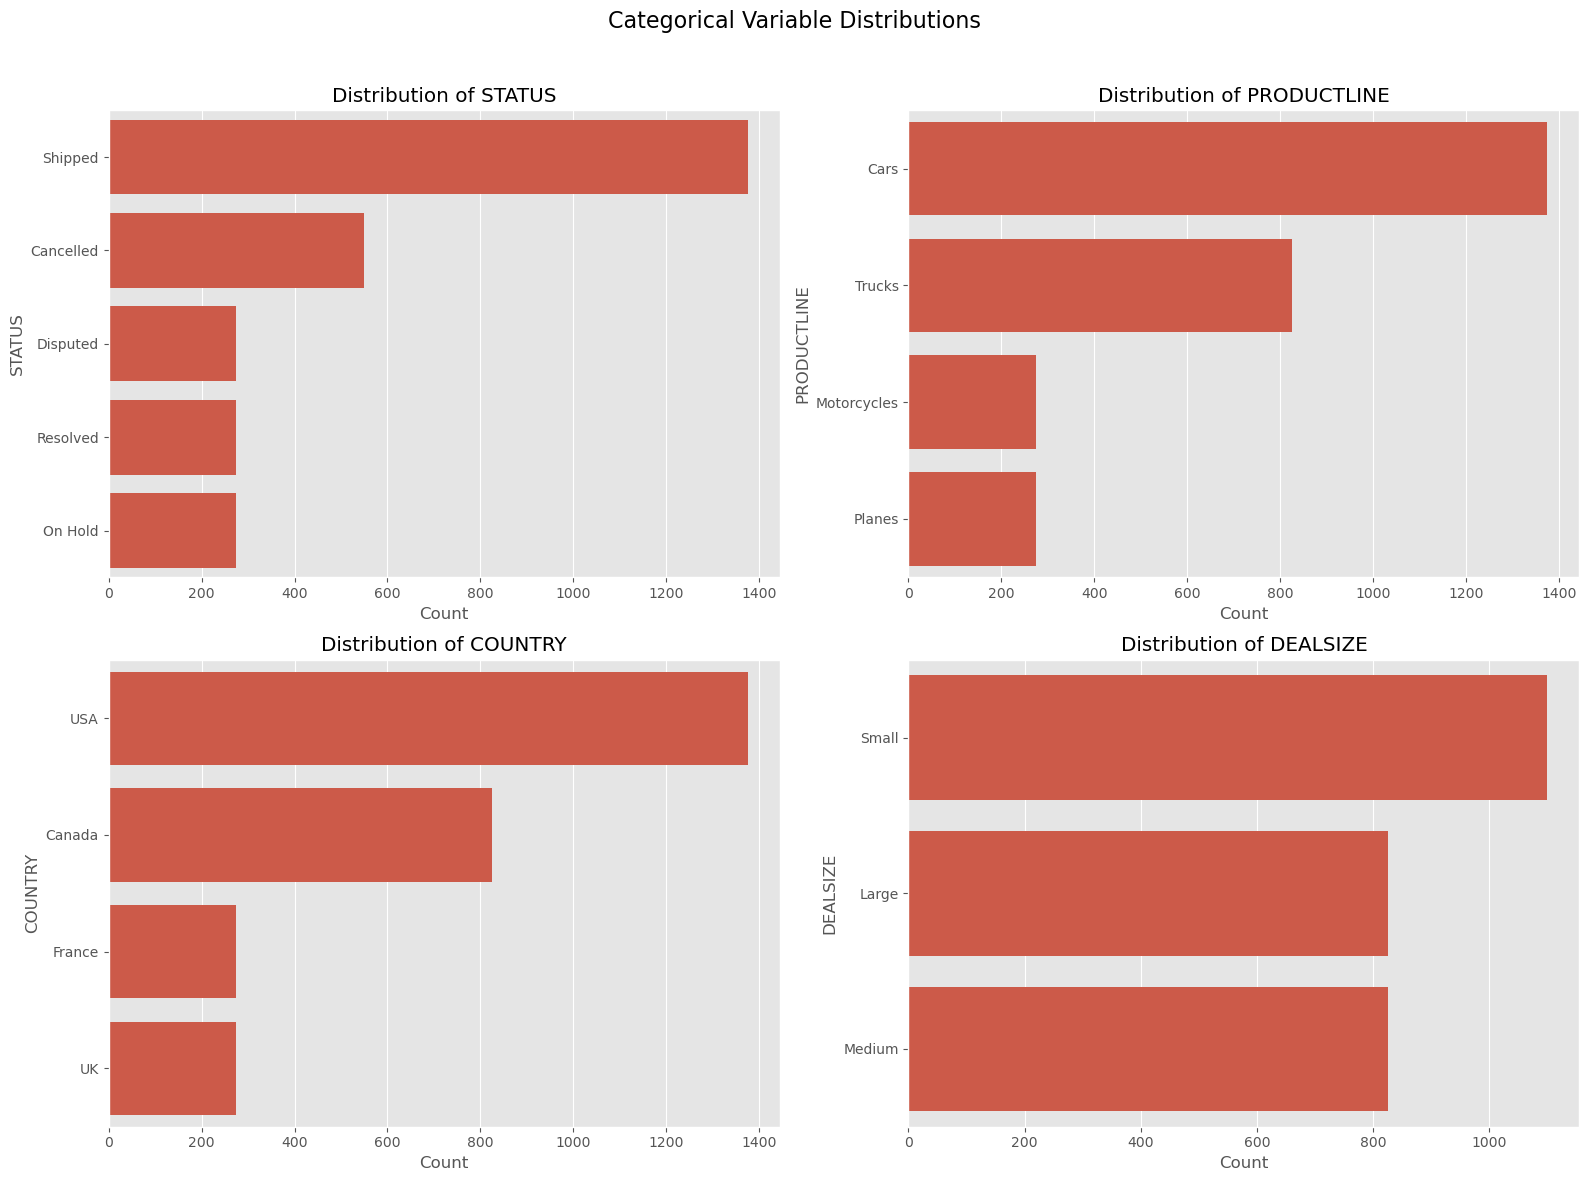

In [35]:

# Define the categorical columns
categorical_cols = ['STATUS', 'PRODUCTLINE', 'COUNTRY', 'DEALSIZE']

# Create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Categorical Variable Distributions', fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through columns and axes
for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [11]:
# Convert ORDERDATE to datetime objects
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Set ORDERDATE as index for time-series analysis (optional but useful)
df.set_index('ORDERDATE', inplace=True)

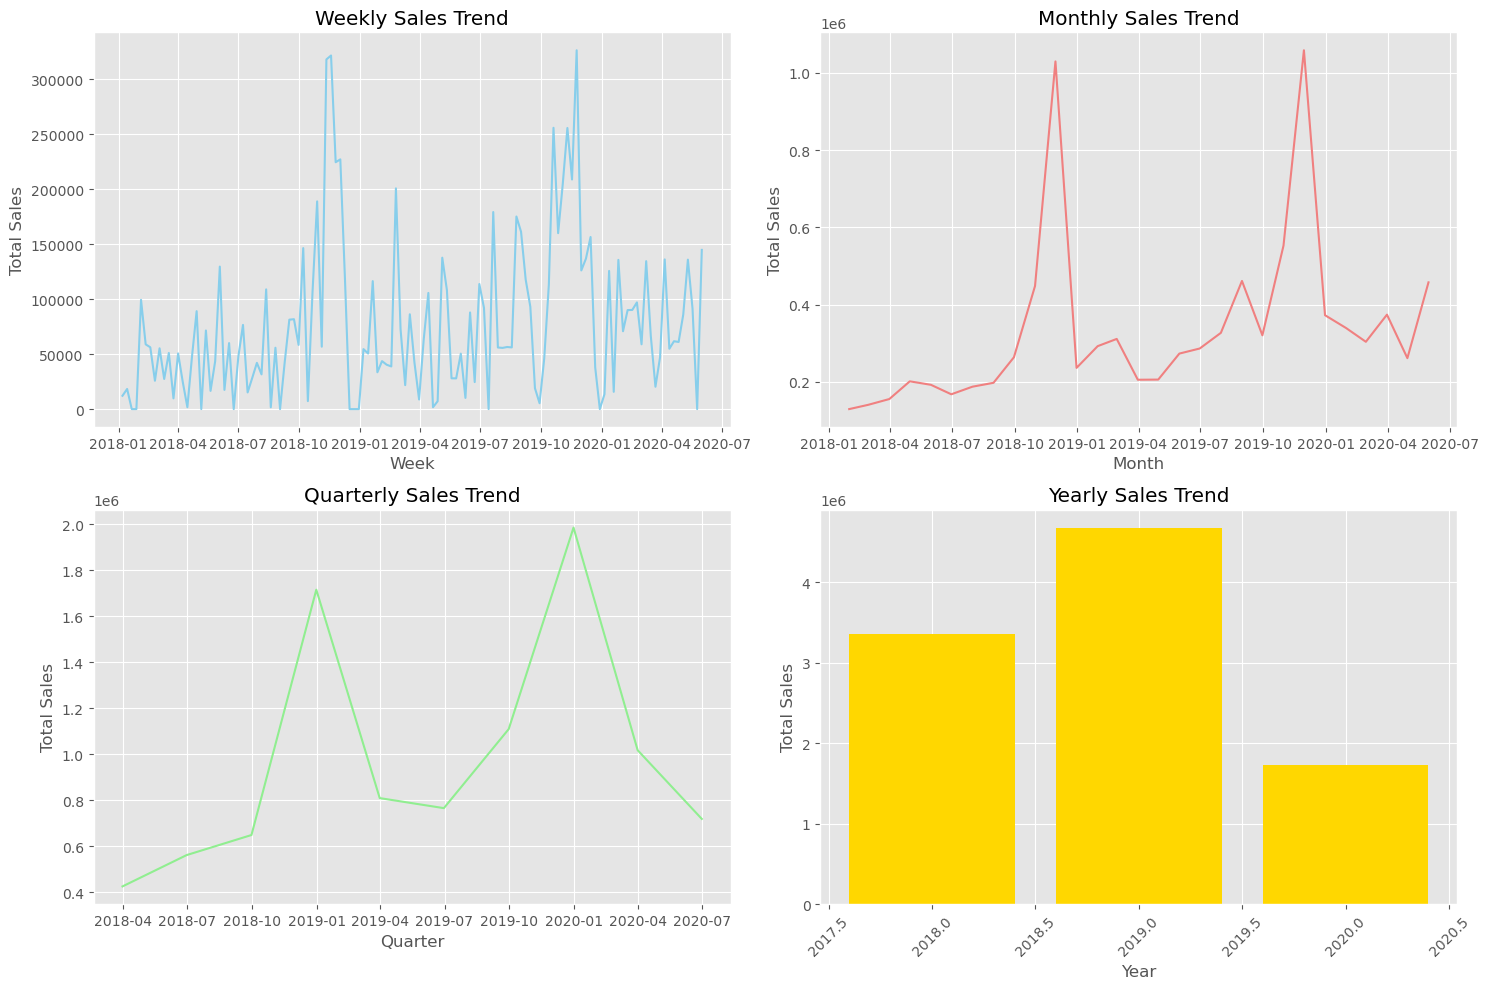

In [18]:

import seaborn as sns  # For potentially nicer default colors

# --- Sales Trends Over Time ---
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid of subplots

# Weekly Sales
weekly_sales = df['SALES'].resample('W').sum()
axes[0, 0].plot(weekly_sales, color='skyblue')
axes[0, 0].set_title('Weekly Sales Trend')
axes[0, 0].set_xlabel('Week')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].grid(True)

# Monthly Sales
monthly_sales = df['SALES'].resample('M').sum()
axes[0, 1].plot(monthly_sales, color='lightcoral')
axes[0, 1].set_title('Monthly Sales Trend')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Sales')
axes[0, 1].grid(True)

# Quarterly Sales
quarterly_sales = df['SALES'].resample('Q').sum()
axes[1, 0].plot(quarterly_sales, color='lightgreen')
axes[1, 0].set_title('Quarterly Sales Trend')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Total Sales')
axes[1, 0].grid(True)

# Yearly Sales
yearly_sales = df['SALES'].resample('Y').sum()
axes[1, 1].bar(yearly_sales.index.year, yearly_sales.values, color='gold')
axes[1, 1].set_title('Yearly Sales Trend')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Total Sales')
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


<Figure size 1800x1000 with 0 Axes>

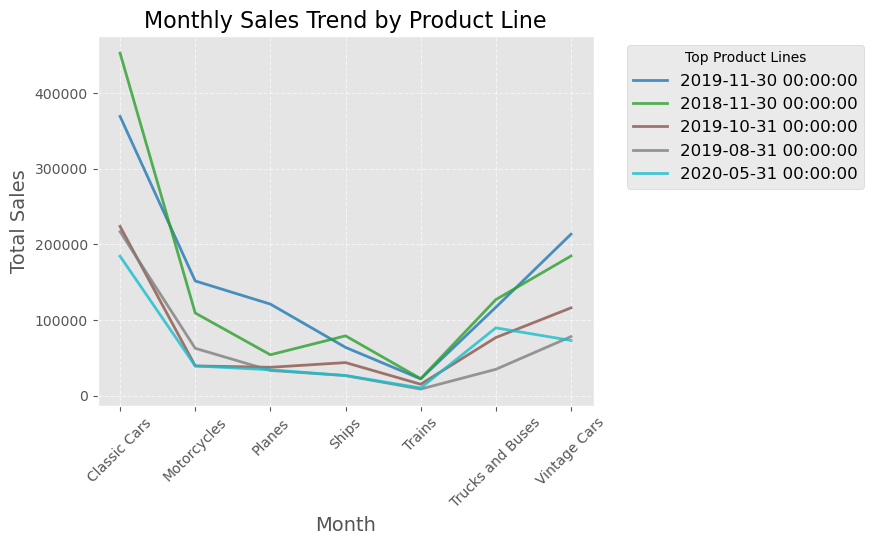

In [16]:
import matplotlib.pyplot as plt

# --- Sales Trends Across Categories (Monthly) ---
plt.figure(figsize=(18, 10))  # Bigger figure size for clarity

# Select top N product lines with highest sales for visualization
top_n = 5  # Adjust as needed
top_product_lines = monthly_sales_by_product.sum().nlargest(top_n).index
filtered_sales = monthly_sales_by_product[top_product_lines]

# Plot only the top product lines
filtered_sales.plot(kind='line', cmap='tab10', linewidth=2, alpha=0.8)

# Improve labels and grid
plt.title('Monthly Sales Trend by Product Line', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate for better readability

# Adjust legend placement and size
plt.legend(title='Top Product Lines', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.6)  # Light gridlines for readability
plt.show()


<Figure size 1600x900 with 0 Axes>

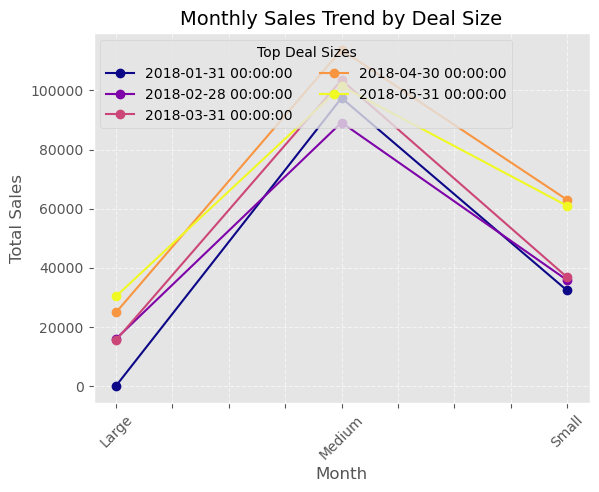

In [21]:
plt.figure(figsize=(16, 9))  # Larger figure for clarity
top_deal_sizes = monthly_sales_by_dealsize.iloc[:, :5]  # Select top 5 deal sizes
top_deal_sizes.plot(kind='line', cmap='plasma', linestyle='-', marker='o')

plt.title('Monthly Sales Trend by Deal Size', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)  # Rotate for better readability
plt.legend(title='Top Deal Sizes', loc='upper left', fontsize=10, ncol=2)  # Reduce legend clutter
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


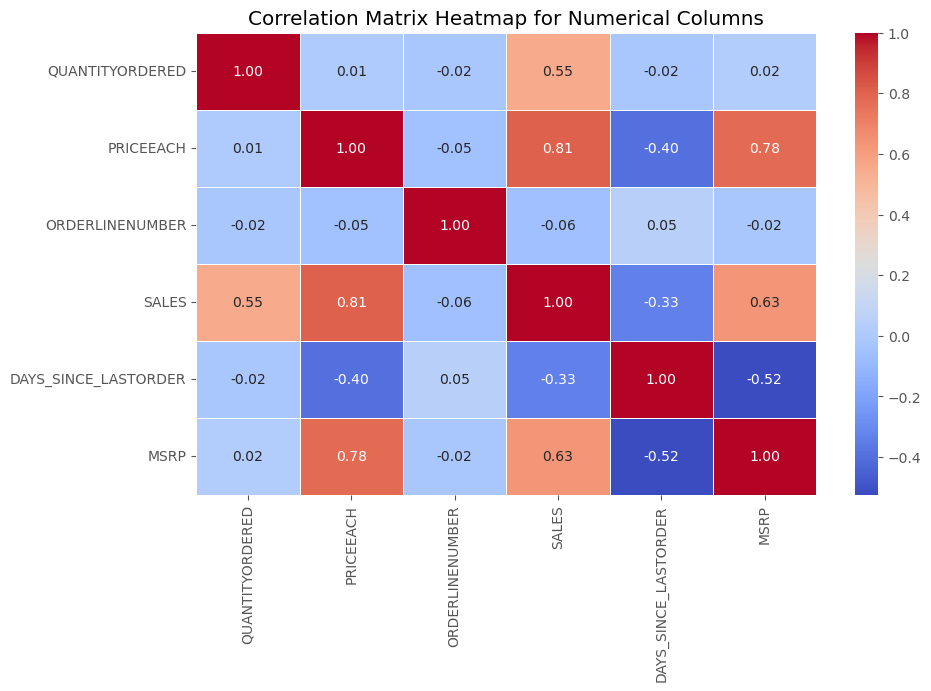

In [11]:

# Selecting only numerical columns
numerical_cols = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 
                  'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP']

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for Numerical Columns")
plt.show()


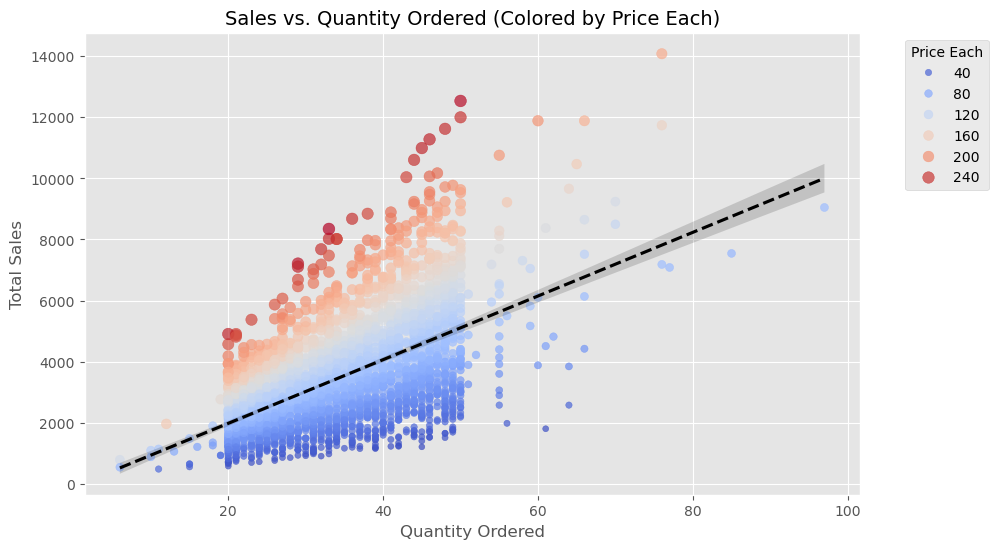

In [26]:



plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='QUANTITYORDERED', 
    y='SALES', 
    hue='PRICEEACH',  # Color by unit price
    size='PRICEEACH',  # Adjust marker size based on unit price
    palette='coolwarm',  
    alpha=0.7,  # Transparency for better visibility
    edgecolor=None, 
    data=df
)


sns.regplot(
    x='QUANTITYORDERED', 
    y='SALES', 
    data=df, 
    scatter=False,  # Hide default regression points
    color='black', 
    line_kws={'linestyle':'dashed'}
)


plt.title('Sales vs. Quantity Ordered (Colored by Price Each)', fontsize=14)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title="Price Each", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


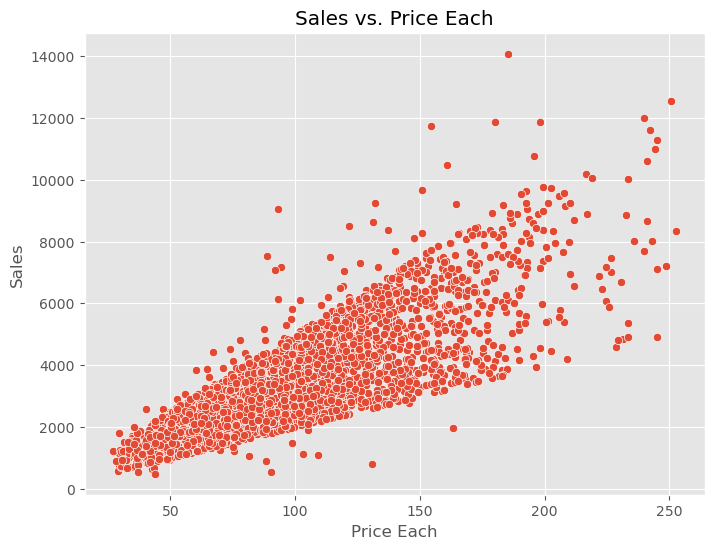

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRICEEACH', y='SALES', data=df)
plt.title('Sales vs. Price Each')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

In [28]:
# Product Line vs. Deal Size (using a contingency table and heatmap)
cross_tab = pd.crosstab(df['PRODUCTLINE'], df['DEALSIZE'])
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Product Line vs. Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Product Line')
plt.show()

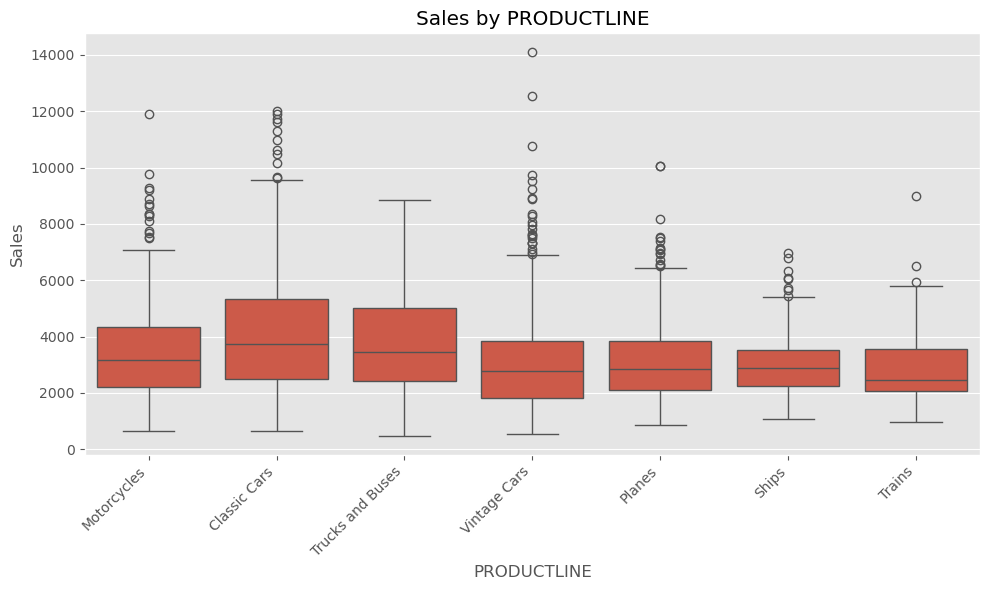

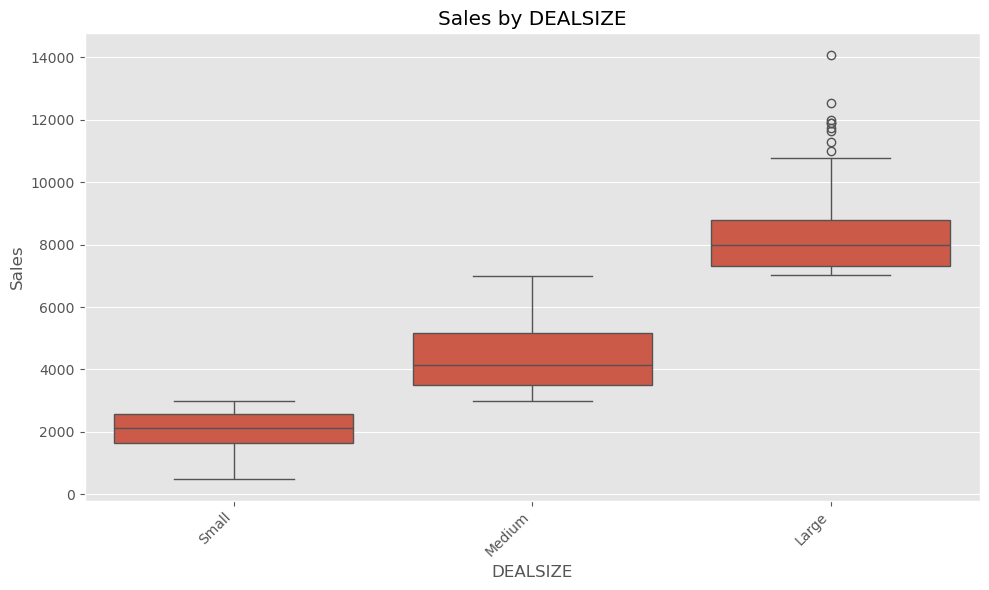

In [29]:
# Boxplots for Sales by Categorical Variables
categorical_cols_for_boxplot = ['STATUS', 'PRODUCTLINE', 'DEALSIZE']
for col in categorical_cols_for_boxplot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SALES', data=df)
    plt.title(f'Sales by {col}')
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [12]:

# Select relevant columns
cols = ['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 
        'DAYS_SINCE_LASTORDER', 'MSRP', 'DEALSIZE']

fig = px.parallel_coordinates(
    df[cols],
    color='SALES',  # Use SALES as color gradient
    color_continuous_scale=px.colors.diverging.Tealrose,
    labels={col: col.replace('_', ' ') for col in cols},
    title='Multivariate Analysis using Parallel Coordinates'
)
fig.show()


In [13]:
# Drop unnecessary columns and keep only those relevant for RFM analysis
relevant_columns = ['ORDERNUMBER', 'CUSTOMERNAME', 'ORDERDATE', 'SALES']
df_rfm = df[relevant_columns].copy()

# Optional: Preview the cleaned dataset
print(df_rfm.head())

# Save this cleaned data to a new Excel file for KNIME
df_rfm.to_excel("Cleaned_RFM_Data.xlsx", index=False)


   ORDERNUMBER          CUSTOMERNAME  ORDERDATE    SALES
0        10107     Land of Toys Inc. 2018-02-24  2871.00
1        10121    Reims Collectables 2018-05-07  2765.90
2        10134       Lyon Souveniers 2018-07-01  3884.34
3        10145     Toys4GrownUps.com 2018-08-25  3746.70
4        10168  Technics Stores Inc. 2018-10-28  3479.76


In [14]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

   ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0 2018-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1 2018-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2 2018-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3 2018-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4 2018-10-28                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        897 Long Airport Avenue   
1    Reims Collectables        26.47.1555             59 rue de l'Abbaye   
2       Lyon Souveniers  +33 1 46 62 7555  27 rue du Colonel Pierre Avia   
3     Toys4GrownUps.com        6265557265             78934 Hillside Dr.   
4  Technics Stores Inc.        6505556809              9408 Furth Circle   

         CITY POSTALCODE COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         NYC      10022     USA              Yu             Kwai    Small  
1       Reims      51100  France         Henriot             Paul    Small  
2       Paris      75508  France        Da Cunha           Daniel   Medium  
3    Pasadena      90003     USA           Young            Julie   Medium  
4  Burlingame      94217     USA          Hirano             Juri   Medium

In [16]:
df_rfm.isnull().sum()

ORDERNUMBER     0
CUSTOMERNAME    0
ORDERDATE       0
SALES           0
dtype: int64